## Environment set up

In this LiveProject, we will use Tensorflow 2.0 version for our work. This lab was created and validated using Tensorflow for GPU version 2.0.0-rc0, running in Google colab.

In [0]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 49kB/s 
     |████████████████████████████████| 501kB 16.9MB/s 
     |████████████████████████████████| 4.3MB 56.4MB/s 


Check the Tensorflow version installed.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


### Load IMDB data
Load the IMDB review data as numpy array. The dataset is nicely split into training and test, and then into data (`x`) and label (`y`). 

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz',
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)

17465344/17464789 [==============================] - 0s 0us/step


Examine the data type with `type` command.



In [5]:
type(x_train)

numpy.ndarray

Examine data structure with `numpy`'s `shape` command 

In [6]:
x_train.shape

(25000,)

Let us take a look at the content.

In [7]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

It appears each element is a in the `numpy` array is a list of integers. This suggests that each integer encodes a word, which requires a dictionary in order to map it back to actual word.

In [8]:
x_test.shape

(25000,)

Let us load the word index provided by the dataset. 

In [10]:
word_index = tf.keras.datasets.imdb.get_word_index(path='imdb_word_index.json')

1646592/1641221 [==============================] - 0s 0us/step


The word index is a type of data structure known as `dictionary`, which is a key-value pair. Later we will use this as a basis to map integers back to words.

In [13]:
type(word_index)

dict

In [14]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

We can also find out how many unique words this dictionary contains.

In [15]:
len(word_index)

88584

Now we know there are 88584 unique words (tokens) in the imdb dataset. Each word has a unique number associated with it. This structure is known as key-value pair. Therefore, there are 88584 key-value pairs, organized as a dictionary in Python datra structure. As examples, below are a few words (tokens) in this dictionary.

In [16]:
{k:v for (k,v) in word_index.items() if v < 20}

{'a': 3,
 'and': 2,
 'as': 14,
 'br': 7,
 'but': 18,
 'film': 19,
 'for': 15,
 'i': 10,
 'in': 8,
 'is': 6,
 'it': 9,
 'movie': 17,
 'of': 4,
 'that': 12,
 'the': 1,
 'this': 11,
 'to': 5,
 'was': 13,
 'with': 16}

Now lets add a few special words for use later. This is a common practice for NLP problem, where it is important to bring a consistency to text strings by giving it a start, a token to handle words outside this dictionary, as well as padding to ensure all text data have same length. We bump original words by three positions, and appended the following new words to the dictionary. We also reverse the key-value relationship and created a new dictionary for reverse lookup. In addition, we created a function `decode_review` to convert data from integer into words.

In [0]:
""# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
example1 = decode_review(x_train[0])

In [0]:
new_x_train=x_train.reshape(len(x_train), 1)

In [20]:
mylen = np.vectorize(len)
print(mylen(x_train))

[218 189 141 ... 184 150 153]


Now find the index for positive and negative reviews

In [0]:
positive_index = np.where(y_train == 1) 
negative_index = np.where(y_train == 0)

In [0]:
positive_reviews = x_train[positive_index]
negative_reviews = x_train[negative_index]

In [25]:
np.shape(positive_reviews)

(12500,)

### Basic discovery
Let us try to answer the following question:
How is length different between positive and negative reviews? 

This is important because we want ot know if the amount of information contained in the review are different depending on types of reviews.

In [0]:
# Find the length of each element 
positive_review_length = [len(i) for i in positive_reviews] 
negative_review_length = [len(i) for i in negative_reviews] 

We will use `python`'s `Counter` to perform frequency counting.

In [33]:
from collections import Counter
type(Counter(positive_review_length))

collections.Counter

In [0]:
from collections import Counter
positive_most_common_length,p_frequency_of_occurrence = Counter(positive_review_length).most_common(1)[0]
negative_most_common_length,n_frequency_of_occurrence = Counter(negative_review_length).most_common(1)[0]

In [35]:
print('The most frequent length for positive review is %d words and it occurs %d times' %(positive_most_common_length,p_frequency_of_occurrence))
print('The most frequent length for negative review is %d words and it occurs %d times' %(negative_most_common_length,n_frequency_of_occurrence))

The most frequent length for positive review is 125 words and it occurs 95 times
The most frequent length for negative review is 132 words and it occurs 105 times


Lets make a figure to visualize distributions of review length

In [0]:
import seaborn as sns

sns.set_style('darkgrid')


[Text(0, 0.5, 'frequency of occurence'), Text(0.5, 0, 'total word count')]

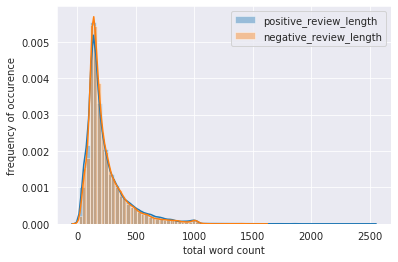

In [37]:
fig, ax = plt.subplots()
sns.distplot(positive_review_length, label='positive_review_length')
sns.distplot(negative_review_length, label='negative_review_length')
ax.legend()
ax.set(xlabel='total word count', ylabel='frequency of occurence')